# First use of PmagPy

## Import the pmagpy packages

In [23]:
import pmagpy.ipmag as ipmag
import pmagpy.pmag as pmag
import matplotlib.pyplot as plt

## Check out the `ipmag.igrf` function docstring

In [2]:
ipmag.igrf?

Signature: ipmag.igrf(input_list, mod='', ghfile='')
Docstring:
Determine Declination, Inclination and Intensity from the IGRF model.
(http://www.ngdc.noaa.gov/IAGA/vmod/igrf.html)

Parameters
----------
input_list : list with format [Date, Altitude, Latitude, Longitude]
    date must be in decimal year format XXXX.XXXX (Common Era)
mod :  desired model
    "" : Use the IGRF
    custom : use values supplied in ghfile
    or choose from this list
    ['arch3k','cals3k','pfm9k','hfm10k','cals10k.2','cals10k.1b']
    where:
        arch3k (Korte et al., 2009)
        cals3k (Korte and Constable, 2011)
        cals10k.1b (Korte et al., 2011)
        pfm9k  (Nilsson et al., 2014)
        hfm10k is the hfm.OL1.A1 of Constable et al. (2016)
        cals10k.2 (Constable et al., 2016)
        the first four of these models, are constrained to agree
        with gufm1 (Jackson et al., 2000) for the past four centuries


gh : path to file with l m g h data

Returns
-------
igrf_array : array of I

In [3]:
Berkeley_field = ipmag.igrf([2020, 0, 37.87, -122.27])
Berkeley_field

array([1.37988492e+01, 6.13403282e+01, 4.86139947e+04])

In [4]:
Berkeley_dec = Berkeley_field[0]

In [5]:
Berkeley_inc = Berkeley_field[1]

In [6]:
Berkeley_dec_GAD = 0

## The dipole equation

tan(inclination) = 2 tan(latitude)

inclination = atan(2 tan(latitude))

In [7]:
Berkeley_inc_GAD = ipmag.inc_from_lat(37.87)
Berkeley_inc_GAD

57.26009565500149

In [8]:
pmag.angle?

Signature: pmag.angle(D1, D2)
Docstring:
Calculate the angle between two directions.

Parameters
----------
D1 : Direction 1 as an array of [declination, inclination] pair or pairs
D2 : Direction 2 as an array of [declination, inclination] pair or pairs

Returns
-------
angle : angle between the directions as a single-element array

Examples
--------
>>> pmag.angle([350.0,10.0],[320.0,20.0])
array([ 30.59060998])
File:      ~/0000_Github/PmagPy/pmagpy/pmag.py
Type:      function


In [9]:
pmag.angle([Berkeley_dec,Berkeley_inc],[Berkeley_dec_GAD,Berkeley_inc_GAD])

array([8.11800087])

In [14]:
Nick_bday_field = ipmag.igrf([1983, 0.253, 44.9778, -93.2650])
Nick_bday_field

array([3.94833781e+00, 7.31957468e+01, 5.87656428e+04])

In [15]:
Nick_bday_dec = Nick_bday_field[0]
Nick_bday_dec

3.948337809009842

In [17]:
Nick_bday_inc = Nick_bday_field[1]
Nick_bday_inc

73.19574676935736

In [19]:
Nick_bday_dec_GAD = 0
Nick_bday_inc_GAD = ipmag.inc_from_lat(44.9778)
Nick_bday_inc_GAD

63.417184692835235

In [21]:
pmag.angle([Nick_bday_dec_GAD,Nick_bday_inc_GAD],[Nick_bday_dec,Nick_bday_inc])

array([9.88160988])

In [20]:
ipmag.plot_di?

Signature:
ipmag.plot_di(
    dec=None,
    inc=None,
    di_block=None,
    color='k',
    marker='o',
    markersize=20,
    legend='no',
    label='',
    title='',
    edge='',
    alpha=1,
)
Docstring:
Plot declination, inclination data on an equal area plot.

Before this function is called a plot needs to be initialized with code that looks
something like:
>fignum = 1
>plt.figure(num=fignum,figsize=(10,10),dpi=160)
>ipmag.plot_net(fignum)

Required Parameters
-----------
dec : declination being plotted
inc : inclination being plotted

or

di_block: a nested list of [dec,inc,1.0]
(di_block can be provided instead of dec, inc in which case it will be used)

Optional Parameters (defaults are used if not specified)
-----------
color : the default color is black. Other colors can be chosen (e.g. 'r')
marker : the default marker is a circle ('o')
markersize : default size is 20
label : the default label is blank ('')
legend : the default is no legend ('no'). Putting 'yes' will plot a l

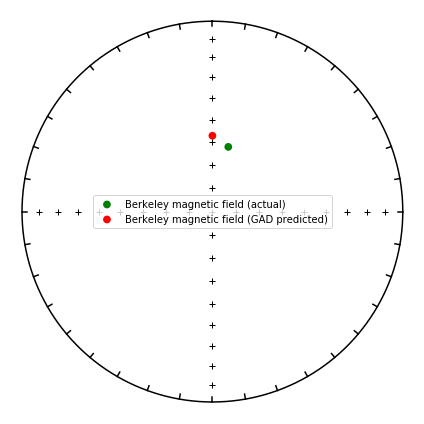

In [45]:
plt.figure(figsize=(6,6))
ipmag.plot_net()
ipmag.plot_di(dec=Berkeley_dec,inc=Berkeley_inc,color='green',
              markersize=60,label='Berkeley magnetic field (actual)')
ipmag.plot_di(dec=Berkeley_dec_GAD,inc=Berkeley_inc_GAD,color='red',
              markersize=60,label='Berkeley magnetic field (GAD predicted)')
plt.legend()
plt.savefig('Berkeley_field_direction.pdf')
plt.savefig('Berkeley_field_direction.png')
plt.show()

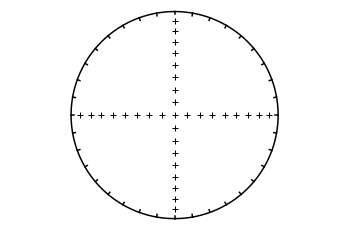